In [20]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend

import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
from tensorflow.keras.utils import to_categorical

2023-10-13 10:43:35.579313: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale


import numpy as np
import pandas as pd

In [25]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [27]:
features = pd.read_csv("/Users/kimjuhwan/Desktop/data/pamap2.csv", index_col=0)

In [28]:
features

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [35]:
select_hand=['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1','handAcc6_2', 'handAcc6_3', 'handGyro1','handGyro2','handGyro3','handMagne1','handMagne2','handMagne3']
h_features = features[select_hand]

In [36]:
h_features

,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,handMagne1,handMagne2,handMagne3
2932,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,-67.18250,-20.0857
2943,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,-0.431227,0.002685,-0.062964,9.14612,-67.39360,-20.5508
2954,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,0.075692,-0.030792,0.005246,9.69163,-67.08980,-21.2481
2965,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,-0.259058,-0.267895,-0.038533,9.58694,-67.08820,-20.8997
2976,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,0.377115,-0.023688,-0.020670,8.59622,-67.14860,-20.1947
...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,0.039195,0.012003,-0.026437,17.71230,-4.80473,-41.8342
2818413,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,0.011127,0.038150,0.059271,18.33580,-5.21004,-41.4393
2818423,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,0.000674,0.034051,0.008866,17.71400,-4.92892,-41.8335
2818435,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,-0.048145,0.034565,-0.001782,18.08540,-4.82465,-41.8349


In [37]:
select_chest=['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3','chestAcc6_1', 'chestAcc6_2','chestAcc6_3','chestGyro1','chestGyro2','chestGyro3','chestMagne1','chestMagne2','chestMagne3']
c_features = features[select_chest]

In [38]:
c_features

,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3
2932,0.352225,9.72437,-1.686650,0.173568,9.69512,-1.534140,0.000275,-0.013352,-0.039315,0.462317,-50.7110,42.92280
2943,0.125825,9.72560,-1.613310,0.143761,9.71023,-1.503690,-0.029411,-0.037321,-0.033805,1.113440,-50.1898,44.64950
2954,0.199567,9.64954,-1.689170,0.083704,9.75569,-1.533420,-0.009560,-0.055878,-0.044714,1.032800,-50.8441,43.17650
2965,0.279626,9.80069,-1.572050,0.114698,9.78564,-1.412620,-0.067753,0.020297,-0.012148,0.671351,-50.2744,43.29430
2976,0.428255,9.64882,-1.685030,0.218926,9.60427,-1.398660,0.007856,0.001881,-0.058687,2.177730,-51.2222,43.68360
...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,-2.176960,9.63375,0.397475,-2.399840,9.77329,0.703170,0.019680,0.018043,-0.013087,21.723400,-30.6849,8.91800
2818413,-2.145710,9.63208,0.165721,-2.266810,9.53169,0.565652,0.056830,-0.038897,0.005755,21.973900,-29.9201,8.63339
2818423,-1.882640,9.51751,0.054697,-2.161590,9.57682,0.504698,-0.060698,-0.026238,0.049355,21.971700,-30.6947,9.48380
2818435,-1.867470,9.63384,0.557966,-2.128490,9.69697,0.882662,-0.025373,0.022089,0.019818,21.863500,-30.8185,8.35572


In [39]:
from sklearn.preprocessing import StandardScaler

hand_X = features[select_hand]
hand_y = features['activityID']

scaler = StandardScaler()
hand_X = scaler.fit_transform(hand_X)

scaled_hand_X = pd.DataFrame(data = hand_X, columns = [select_hand])
scaled_hand_X['label'] = hand_y.values

In [40]:
chest_X = features[select_chest]
chest_y = features['activityID']

scaler = StandardScaler()
chest_X = scaler.fit_transform(chest_X)

scaled_chest_X = pd.DataFrame(data = chest_X, columns = [select_chest])
scaled_chest_X['label'] = chest_y.values

In [59]:
from sklearn.model_selection import train_test_split

hand_X_train, hand_X_test, hand_y_train, hand_y_test = train_test_split(scaled_hand_X, 
                                                    scaled_hand_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [60]:
chest_X_train, chest_X_test, chest_y_train, chest_y_test = train_test_split(scaled_chest_X, 
                                                    scaled_chest_X["label"],
                                                    test_size = 0.95, 
                                                    shuffle = True, 
                                                    random_state = 21)

## Hyperparameter Tunning

In [61]:
TIME_STEPS = 40
STEP = 10

In [62]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i+time_steps)].values
        labels = y.iloc[i:i+time_steps]
        Xs.append(v)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

hand_X_train, hand_y_train = create_dataset(hand_X_train, hand_y_train, TIME_STEPS,
                                  STEP)
hand_X_test, hand_y_test = create_dataset(hand_X_test, hand_y_test, TIME_STEPS,
                                  STEP)
print(hand_X_train.shape, hand_y_train.shape)

/var/folders/cf/560dzg5j06ndjd6b99gs0_rw0000gn/T/ipykernel_22562/658346896.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


(589, 40, 13) (589, 1)


In [63]:
chest_X_train, chest_y_train = create_dataset(chest_X_train, chest_y_train, TIME_STEPS,
                                  STEP)
chest_X_test, chest_y_test = create_dataset(chest_X_test, chest_y_test, TIME_STEPS,
                                  STEP)
print(chest_X_train.shape, chest_y_train.shape)

/var/folders/cf/560dzg5j06ndjd6b99gs0_rw0000gn/T/ipykernel_22562/658346896.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


(589, 40, 13) (589, 1)


In [65]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc1 = enc.fit(hand_y_train)
enc2 = enc.fit(chest_y_train)

hand_y_train = enc1.transform(hand_y_train)
hand_y_test = enc1.transform(hand_y_test)
chest_y_train = enc2.transform(chest_y_train)
chest_y_test = enc2.transform(chest_y_test)

/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [67]:
print("hand_X_train.shape: ", hand_X_train.shape)
print("hand_X_test.shape ", hand_X_test.shape)
print("hand_y_train.shape ", hand_y_train.shape)
print("hand_y_test.shape ", hand_y_test.shape)

hand_X_train.shape:  (589, 40, 13)
hand_X_test.shape  (11256, 40, 13)
hand_y_train.shape  (589, 8)
hand_y_test.shape  (11256, 8)


In [68]:
print("chest_X_train.shape: ", chest_X_train.shape)
print("chest_X_test.shape ", chest_X_test.shape)
print("chest_y_train.shape ", chest_y_train.shape)
print("chest_y_test.shape ", chest_y_test.shape)

chest_X_train.shape:  (589, 40, 13)
chest_X_test.shape  (11256, 40, 13)
chest_y_train.shape  (589, 8)
chest_y_test.shape  (11256, 8)


In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# cnn model vary kernel size
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D
from keras.utils import np_utils

In [73]:
verbose,epochs,batch_size=1,10,32 

hand_n_timesteps,hand_n_features,hand_n_outputs=hand_X_train.shape[1],hand_X_train.shape[2],hand_y_train.shape[1]
chest_n_timesteps,chest_n_features,chest_n_outputs=chest_X_train.shape[1],chest_X_train.shape[2],chest_y_train.shape[1]

In [74]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

In [76]:
print(hand_n_timesteps,hand_n_features,hand_n_outputs)
print(chest_n_timesteps, chest_n_features, chest_n_outputs)

40 13 8
40 13 8


In [77]:
#CNN MODEL

inputs = keras.Input(shape=(hand_n_timesteps, hand_n_features))

conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)
maxpool_1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(conv_1)

conv_2=tf.keras.layers.Conv1D(filters=96,kernel_size=3,strides=1,activation='relu')(maxpool_1)
avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_2)
batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

output=tf.keras.layers.Dense(hand_n_outputs,activation='softmax')(batch_norm)
model=tf.keras.Model(inputs=inputs,outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40, 13)]          0         
                                                                 
 conv1d (Conv1D)             (None, 18, 64)            4224      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 9, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 96)             18528     
                                                                 
 global_average_pooling1d (G  (None, 96)               0         
 lobalAveragePooling1D)                                          
                                                                 
 batch_normalization (BatchN  (None, 96)               384   

2023-10-13 11:28:02.958272: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [78]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [79]:
history = model.fit(hand_X_train, hand_y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/100
17/17 [==============================] - 1s 10ms/step - loss: 2.1891 - accuracy: 0.2377 - val_loss: 2.2808 - val_accuracy: 0.1525
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.5291 - accuracy: 0.5000 - val_loss: 2.1326 - val_accuracy: 0.1525
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 1.2246 - accuracy: 0.6151 - val_loss: 2.0984 - val_accuracy: 0.2373
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 1.0141 - accuracy: 0.7075 - val_loss: 2.0295 - val_accuracy: 0.2712
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8196 - accuracy: 0.7660 - val_loss: 1.9149 - val_accuracy: 0.2034
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6770 - accuracy: 0.8245 - val_loss: 1.8414 - val_accuracy: 0.3729
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.5630 - accuracy: 0.8623 - val_loss: 1.7692 - val_accuracy: 0.3559
Epoch 8/100


Epoch 59/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 3.6966 - val_accuracy: 0.2712
Epoch 60/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.6726 - val_accuracy: 0.2712
Epoch 61/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 3.6133 - val_accuracy: 0.3390
Epoch 62/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 3.6645 - val_accuracy: 0.2881
Epoch 63/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 3.7809 - val_accuracy: 0.3051
Epoch 64/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 3.8525 - val_accuracy: 0.2712
Epoch 65/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 3.7744 - val_accuracy: 0.2881
Epoch 

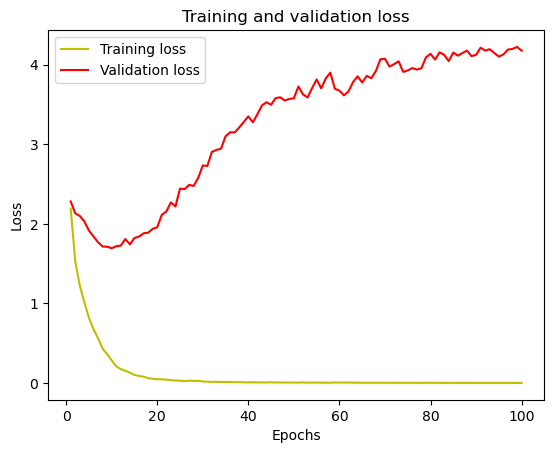

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

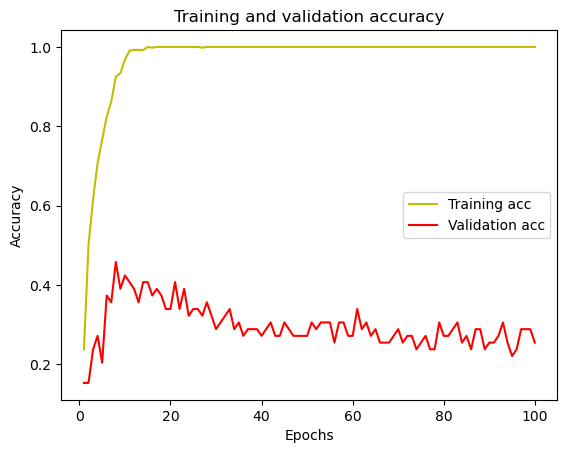

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [83]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [84]:
base_loss,base_accuracy=model.evaluate(hand_X_test,hand_y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

352/352 [==============================] - 0s 808us/step - loss: 3.9020 - accuracy: 0.3358
Accuracy >33.582088
Base Loss >3.90


In [85]:
base_loss,base_accuracy=model.evaluate(chest_X_test,chest_y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

352/352 [==============================] - 0s 804us/step - loss: 4.1347 - accuracy: 0.2868
Accuracy >28.678039
Base Loss >4.13


In [86]:
inputs = keras.Input(shape=(chest_n_timesteps, chest_n_features))

conv_1=tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=2,activation='relu')(inputs)
maxpool_1=tf.keras.layers.MaxPooling1D(pool_size=2,strides=2)(conv_1)

conv_2=tf.keras.layers.Conv1D(filters=96,kernel_size=3,strides=1,activation='relu')(maxpool_1)
avg_pooling=tf.keras.layers.GlobalAveragePooling1D()(conv_2)
batch_norm=tf.keras.layers.BatchNormalization()(avg_pooling)

output=tf.keras.layers.Dense(chest_n_outputs,activation='softmax')(batch_norm)
model=tf.keras.Model(inputs=inputs,outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 40, 13)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 18, 64)            4224      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 9, 64)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 96)             18528     
                                                                 
 global_average_pooling1d_1   (None, 96)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 batch_normalization_1 (Batc  (None, 96)               384 

In [87]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
history = model.fit(chest_X_train, chest_y_train, epochs = 100, batch_size = 32, validation_split = 0.1, shuffle = True)
print(model.summary())

Epoch 1/100
17/17 [==============================] - 0s 9ms/step - loss: 2.2309 - accuracy: 0.2038 - val_loss: 2.0732 - val_accuracy: 0.2203
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.6073 - accuracy: 0.4396 - val_loss: 2.1198 - val_accuracy: 0.1864
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 1.3104 - accuracy: 0.5679 - val_loss: 2.2089 - val_accuracy: 0.0678
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 1.0823 - accuracy: 0.6698 - val_loss: 2.0955 - val_accuracy: 0.0847
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9092 - accuracy: 0.7491 - val_loss: 2.0186 - val_accuracy: 0.1186
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.7631 - accuracy: 0.7925 - val_loss: 1.8499 - val_accuracy: 0.3559
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6194 - accuracy: 0.8660 - val_loss: 1.7812 - val_accuracy: 0.3559
Epoch 8/100
1

Epoch 59/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 2.8185 - val_accuracy: 0.4407
Epoch 60/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 2.8510 - val_accuracy: 0.4237
Epoch 61/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.8375 - val_accuracy: 0.4407
Epoch 62/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 2.7482 - val_accuracy: 0.4576
Epoch 63/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 2.8026 - val_accuracy: 0.4576
Epoch 64/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 2.8460 - val_accuracy: 0.4746
Epoch 65/100
17/17 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.8058 - val_accuracy: 0.4746
Epoch 

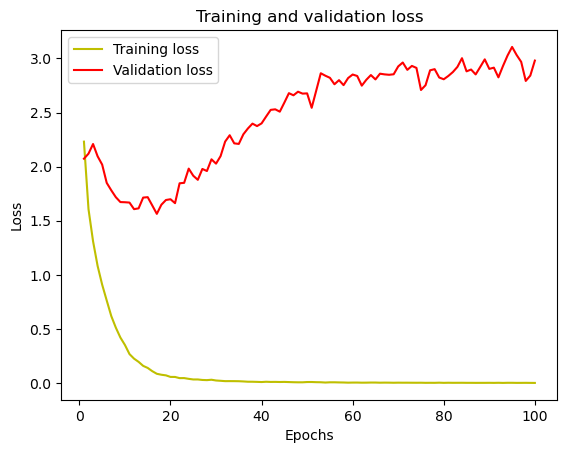

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

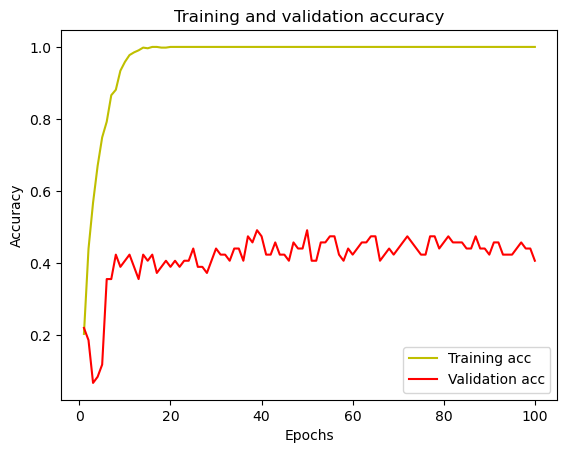

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [91]:
base_loss,base_accuracy=model.evaluate(hand_X_test,hand_y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

352/352 [==============================] - 0s 837us/step - loss: 3.9809 - accuracy: 0.2659
Accuracy >26.590264
Base Loss >3.98


In [92]:
base_loss,base_accuracy=model.evaluate(chest_X_test,chest_y_test,batch_size=batch_size,verbose=1)
  
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

352/352 [==============================] - 0s 854us/step - loss: 3.5558 - accuracy: 0.3192
Accuracy >31.920752
Base Loss >3.56
